# Non-linear classification

With logistic regression our classes must be linearly seperable, but what happens when the classes cannot be linearly seperated? Enter the donut problem, this is an example where logistic regression is not going to be a good fit for the model. In the image below there are two clear classes each with a distinct radius, and there is no way for a line tao separate the two classes.

The first section of this example comes from a Udemy course written by the LazyProgrammer

In [4]:
import numpy as np
import matplotlib.pyplot as plt

500.0


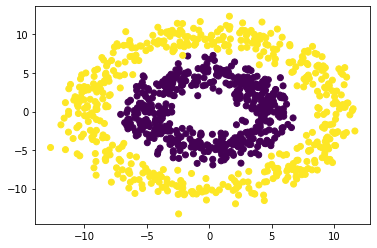

In [13]:
N = 1000
D = 2
newN = N/2
print(newN)


radius_inner = 5
radius_outer = 10

R1 = np.random.randn((N//2)) + radius_inner
theta = 2*np.pi*np.random.random((N//2))
x_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn((N//2)) + radius_outer
theta = 2*np.pi*np.random.random((N//2))
x_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T


X = np.concatenate([x_inner, x_outer])
T = np.array([0]*(N//2) + [1]*(N//2))

plt.scatter(X[:,0], X[:,1], c = T)



But there is a way we can solution this problem using logistic regression, it will require a little bit of additional work but it is possible! With a little bit of feature engineering we can use Logistic regression to solve this particular nonlinear problem. We will create two new fields in our dataset, first a bias term of all ones. The second field will be the distance of each sample to the center of our circles. Below we create this bias term and then use the sigmoid function to predict which class each point belongs to.

In [131]:
#Creating the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [132]:
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1-Y[i])
    return E

1831.271292435251
440.641344044473
393.08893353260856
376.84805892738103
369.63470144386565
Final w: [-9.29740786e+00  1.55629396e+00  4.54515578e-03  1.25448706e-02]
Final Classification Rate: 0.835


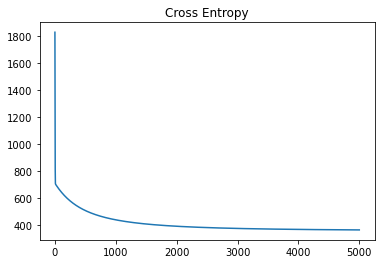

In [133]:
ones = np.array([[1]*N]).T

r = np.zeros((N,1))
for i in range(N):
    r[i] = np.sqrt(X[i,:].dot(X[i,:]))
    
Xb = np.concatenate((ones, r, X), axis = 1)
w = np.random.rand(D*2)
z = Xb.dot(w)
Y = sigmoid(z)
learning_rate = 0.0001 #predetermined value
error = []
for i in range(5000):
    e = cross_entropy(T,Y)
    error.append(e)
    if i % 1000 == 0:
        print(e)
    
    w+=learning_rate * (np.dot((T-Y).T, Xb) - 0.01*w)
    
    Y = sigmoid(Xb.dot(w))
    
plt.plot(error)
plt.title("Cross Entropy")

print("Final w:",w)
print("Final Classification Rate:", 1 - np.abs(T-np.round(Y)).sum()/N)

In the example above we have used Euclidian distance to help us classify our points into one of the two circle classes. By identifying the distance from the center of our circles to each point we created a new variable and leveraged logistic regression to classify our data with 99.2% accuracy. 

We can extend this to the next session and solve the exact same problem using K-Nearest Neighbors classification method. 

# Can we use K-Nearest Neighbors to solve this problem too?

In the situation of the donut problem, we couldnt separate the data linearly so traditional logistic regression wouldn't work, but with an adjustment through feature engineering we used distance to classify our circles. K-Nearest Neighbors is a supervised algoithm that can also help classify nonlinear data. 

A key assumption to the KNN algorithm is the data is in a metric space meaning we can actually calculate the distance between two points. KNN leverages this calculated distance to assign classes to each of the datapoints. 

Take the example below, where we have two datapoints class_1 and class_2. There are a few different ways to calculate distance but this example focuses on Euclidean distance, which is calculated as the sqare root of the sum of squared differences between our two classes. Using the equation below, which calculates the distance or the blue line in the triangle. 

$\sqrt{(x _{2} - x _{1})^{2} + (y _{2} - y _{1})^{2}} $<br></br>

There are other ways to calculate distance like Manhattan Distance, Minkowski Distance, or Hamming Distance. KNN is a little bit different than our logistic regression solution as to solve the donut problem we held one point constant at the center of the circles, but conceptually it is similar.


Text(1.4, 2.5, 'D')

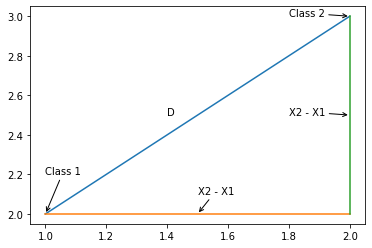

In [123]:
from matplotlib.pyplot import annotate
class_1 = (1,2)
class_2 = (2,3)

diff_x = (class_2[0] - class_1[0])
diff_y = (class_2[1] - class_1[1])

missing_x = class_1[0] + diff_x
missing_y = class_2[1] - diff_y

missing_pt = (missing_x, missing_y)

plt.plot(class_x1, class_x2)
plt.plot(class_x1, missing_pt)
plt.plot(missing_pt, class_2)

annotate('Class 1', xy = (class_1[0], class_1[1]), xytext = (1,2.2), arrowprops = dict(arrowstyle = "->"))
annotate('Class 2', xy = (class_2[0], class_2[1]), xytext = (1.8,3), arrowprops = dict(arrowstyle = "->"))

annotate('X2 - X1', xy = (class_1[0] + (diff_x*0.5), class_1[1]), xytext = (1.5, 2.1), arrowprops = dict(arrowstyle = "->"))
annotate('X2 - X1', xy = (class_2[0], class_2[1] - (diff_y*0.5)), xytext = (1.8, 2.5), arrowprops = dict(arrowstyle = "->"))

annotate('D', xy = (class_2[0], class_2[1] - (diff_y*0.5)), xytext = (1.4, 2.5))

#### How does KNN actually work

Lets apply KNN to the donut problem and see how the algorithm does at classifying our donuts relative to the logistic regression model

In [ ]:
from sklean.datasets import make_classification
features, output = make_classification()

500.0


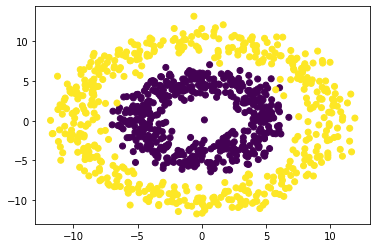

In [134]:
N = 1000
D = 2
newN = N/2
print(newN)


radius_inner = 5
radius_outer = 10

R1 = np.random.randn((N//2)) + radius_inner
theta = 2*np.pi*np.random.random((N//2))
x_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn((N//2)) + radius_outer
theta = 2*np.pi*np.random.random((N//2))
x_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T


X = np.concatenate([x_inner, x_outer])
T = np.array([0]*(N//2) + [1]*(N//2))

plt.scatter(X[:,0], X[:,1], c = T)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [136]:
knnclass = KNeighborsClassifier(n_neighbors = 2)
knnclass.fit(X, T)

KNeighborsClassifier(n_neighbors=2)

In [137]:
knn_prediction = knnclass.predict(X)

In [138]:
print("Final Classification Rate:", 1 - np.abs(T-np.round(knn_prediction)).sum()/N)

Final Classification Rate: 0.995


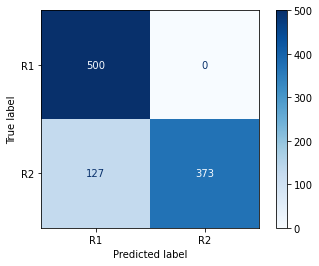

In [145]:
cm = confusion_matrix(T, knn_prediction)
displaycm = ConfusionMatrixDisplay(cm, display_labels=['R1', 'R2'] )
displaycm.plot(cmap = plt.get_cmap('Blues'))

Using KNN we get an accuracy rate of 99.50% which is almost identical to our logistic regression solution. This is a fun example of how we can apply two different solutions to the same problem

# What happens if the circles are closer together? How does that impact accuracy?

500.0


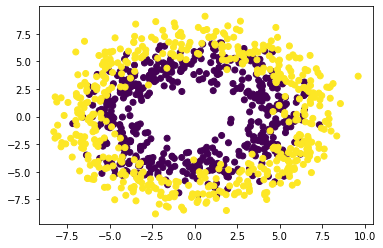

In [140]:
N = 1000
D = 2
newN = N/2
print(newN)


radius_inner = 5
radius_outer = 7

R1 = np.random.randn((N//2)) + radius_inner
theta = 2*np.pi*np.random.random((N//2))
x_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn((N//2)) + radius_outer
theta = 2*np.pi*np.random.random((N//2))
x_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T


X = np.concatenate([x_inner, x_outer])
T = np.array([0]*(N//2) + [1]*(N//2))

plt.scatter(X[:,0], X[:,1], c = T)

In [141]:
knnclass = KNeighborsClassifier(n_neighbors = 2)
knnclass.fit(X, T)

KNeighborsClassifier(n_neighbors=2)

In [142]:
knn_prediction = knnclass.predict(X)

In [143]:
print("Final Classification Rate:", 1 - np.abs(T-np.round(knn_prediction)).sum()/N)

Final Classification Rate: 0.873


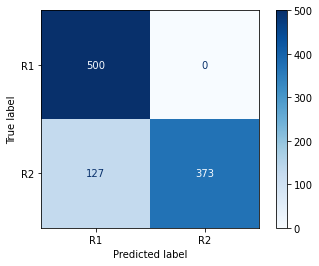

In [144]:
cm = confusion_matrix(T, knn_prediction)
displaycm = ConfusionMatrixDisplay(cm, display_labels=['R1', 'R2'] )
displaycm.plot(cmap = plt.get_cmap('Blues'))

When the circles are closer together, more of our outer circle datapoints get classified as inner circle datapoints. However, we do still get an accuracy rate of 87.30% which is better than randomly guessing!